# Load Packages

In [3]:
using OrdinaryDiffEq
using DiffEqBase
using Sundials
using ODEInterfaceDiffEq
using Plots
using Measures
using CSV
using DataFrames
# using Turing
# using MCMCChains
using EasyFit
using StatsPlots
using LinearAlgebra
using Random
using Distributions
using OrdinaryDiffEq
using LsqFit
using BlackBoxOptim
using LaTeXStrings

In [5]:
Dat1_0M = Matrix(CSV.read("E:\\IBECPostDocDrive\\2024_01_16_NCvsKR\\Paper\\RawData\\0Million_Rep1_HepG2_05_05_2025.csv", DataFrame));
Dat2_0M = Matrix(CSV.read("E:\\IBECPostDocDrive\\2024_01_16_NCvsKR\\Paper\\RawData\\0Million_Rep1_HepG2_18_04_2025.csv", DataFrame));
Dat3_0M = Matrix(CSV.read("E:\\IBECPostDocDrive\\2024_01_16_NCvsKR\\Paper\\RawData\\0Million_Rep1_HepG2_18_04_2025_TryControl3.csv", DataFrame));

Dat1_0P = Matrix(CSV.read("E:\\IBECPostDocDrive\\2024_01_16_NCvsKR\\Paper\\RawData_DiffPyr\\0.0Pyr_2025_04_18_DGC_HepG2_3Mil_0mMPyruvate_NewTryControl1.csv", DataFrame));
Dat2_0P = Matrix(CSV.read("E:\\IBECPostDocDrive\\2024_01_16_NCvsKR\\Paper\\RawData_DiffPyr\\0.0Pyr_2025_04_18_DGC_HepG2_3Mil_0mMPyruvate_NewTryControl2.csv", DataFrame));
Dat3_0P = Matrix(CSV.read("E:\\IBECPostDocDrive\\2024_01_16_NCvsKR\\Paper\\RawData_DiffPyr\\0.0Pyr_2025_04_18_DGC_HepG2_3Mil_0mMPyruvate_NewTryControl3.csv", DataFrame));

In [51]:
mLac = mean(vcat(Dat1_0M[5:end,3], Dat2_0M[5:end,3], Dat3_0M[5:end,3]));
sLac = std(vcat(Dat1_0M[5:end,3], Dat2_0M[5:end,3], Dat3_0M[5:end,3]));

mPyr = mean(vcat(Dat1_0P[5:end,2], Dat2_0P[5:end,2], Dat3_0P[5:end,2]));
sPyr = std(vcat(Dat1_0P[5:end,2], Dat2_0P[5:end,2], Dat3_0P[5:end,2]));

mLac2 = mean(vcat(Dat1_0P[5:end,3], Dat2_0P[5:end,3], Dat3_0P[5:end,3]));
sLac2 = std(vcat(Dat1_0P[5:end,3], Dat2_0P[5:end,3], Dat3_0P[5:end,3]));

In [30]:
blankCells = CSV.read("E:\\IBECPostDocDrive\\2024_01_16_NCvsKR\\DataProcessingInference\\ProcessedData\\0Mil_Dat.csv", DataFrame);
blankPyr = CSV.read("E:\\IBECPostDocDrive\\2024_01_16_NCvsKR\\DataProcessingInference\\ProcessedData\\3Mil_0-0mMPyr_Dat.csv", DataFrame);

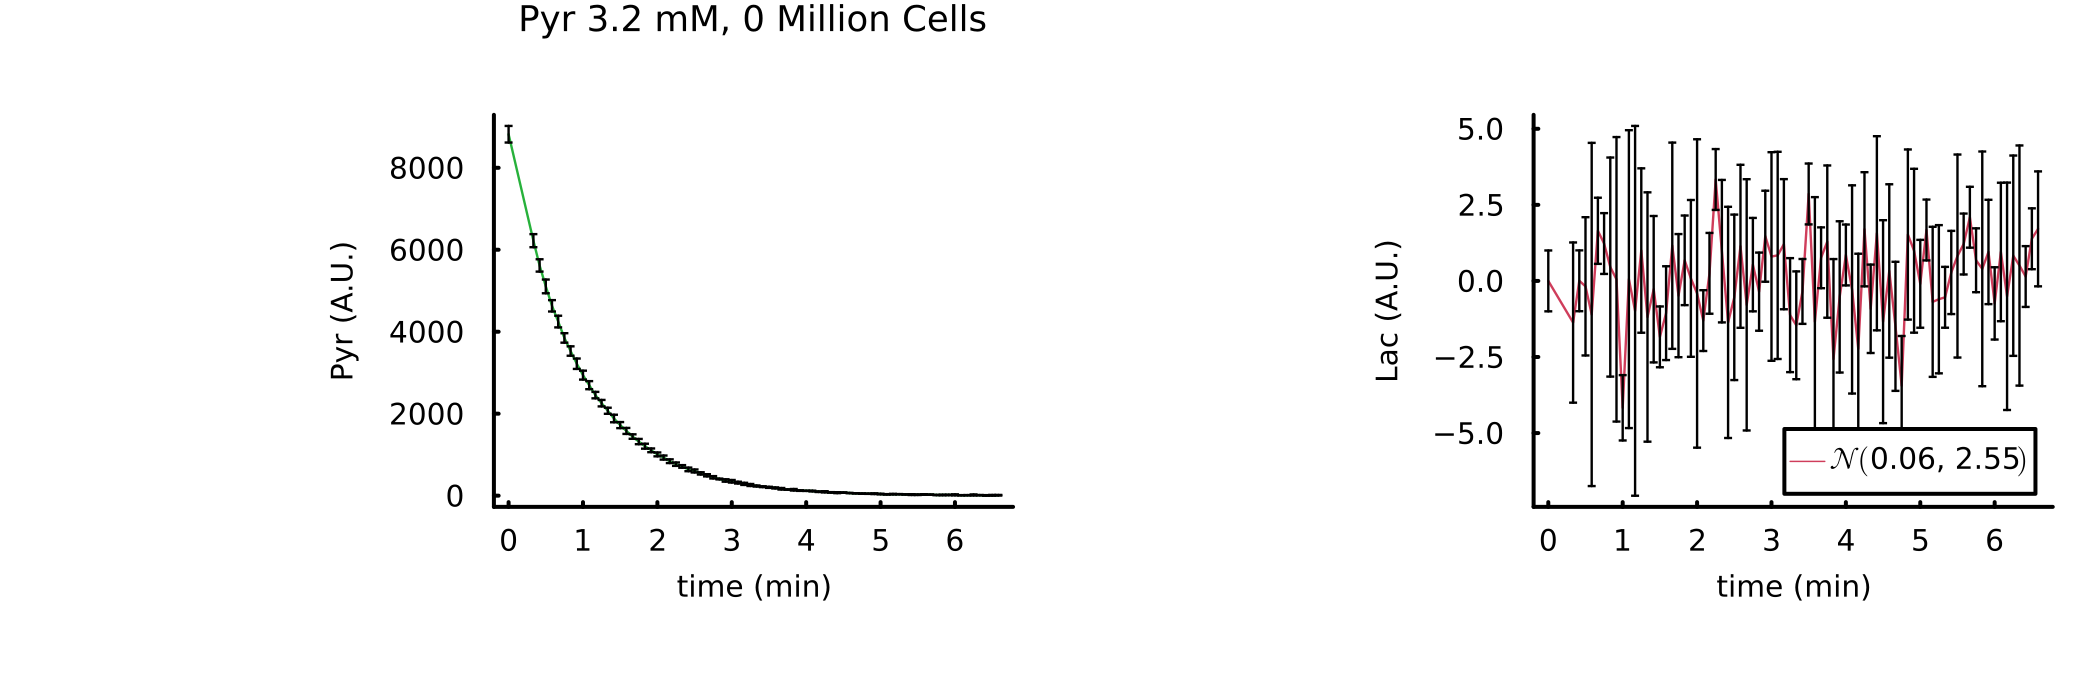

In [85]:
pp1 = plot(blankCells[:,1]./60, blankCells[:,2], yerror = blankCells[:,3], label = "", grid = false, ylabel = "Pyr (A.U.)", 
            xlabel = "time (min)", colour = "#27b13bff", 
            title = "Pyr 3.2 mM, 0 Million Cells")
pp2 = plot(blankCells[:,1]./60, blankCells[:,4], yerror = blankCells[:,5], 
            label = L"\mathcal{N}("*string(round(mLac, digits = 2))*", "*string(round(sLac, digits = 2))*L")", grid = false, ylabel = "Lac (A.U.)", 
            xlabel = "time (min)", colour = "#cf3d5bff")

PP = plot(pp1,pp2, layout = (1,2), markersize=1, markerstrokewidth=0.2, titlefontsize = 6,
linewidth=0.6, size = (2100,700), xguidefontsize=round(25/5), yguidefontsize=round(25/5), tickfontsize=round(25/5), thickness_scaling = 4, legendfontsize=5)

savefig(PP,"E:\\IBECPostDocDrive\\2024_01_16_NCvsKR\\Paper\\Figures\\SuppFig13Stuff\\CellBlankData.svg")

display(PP)

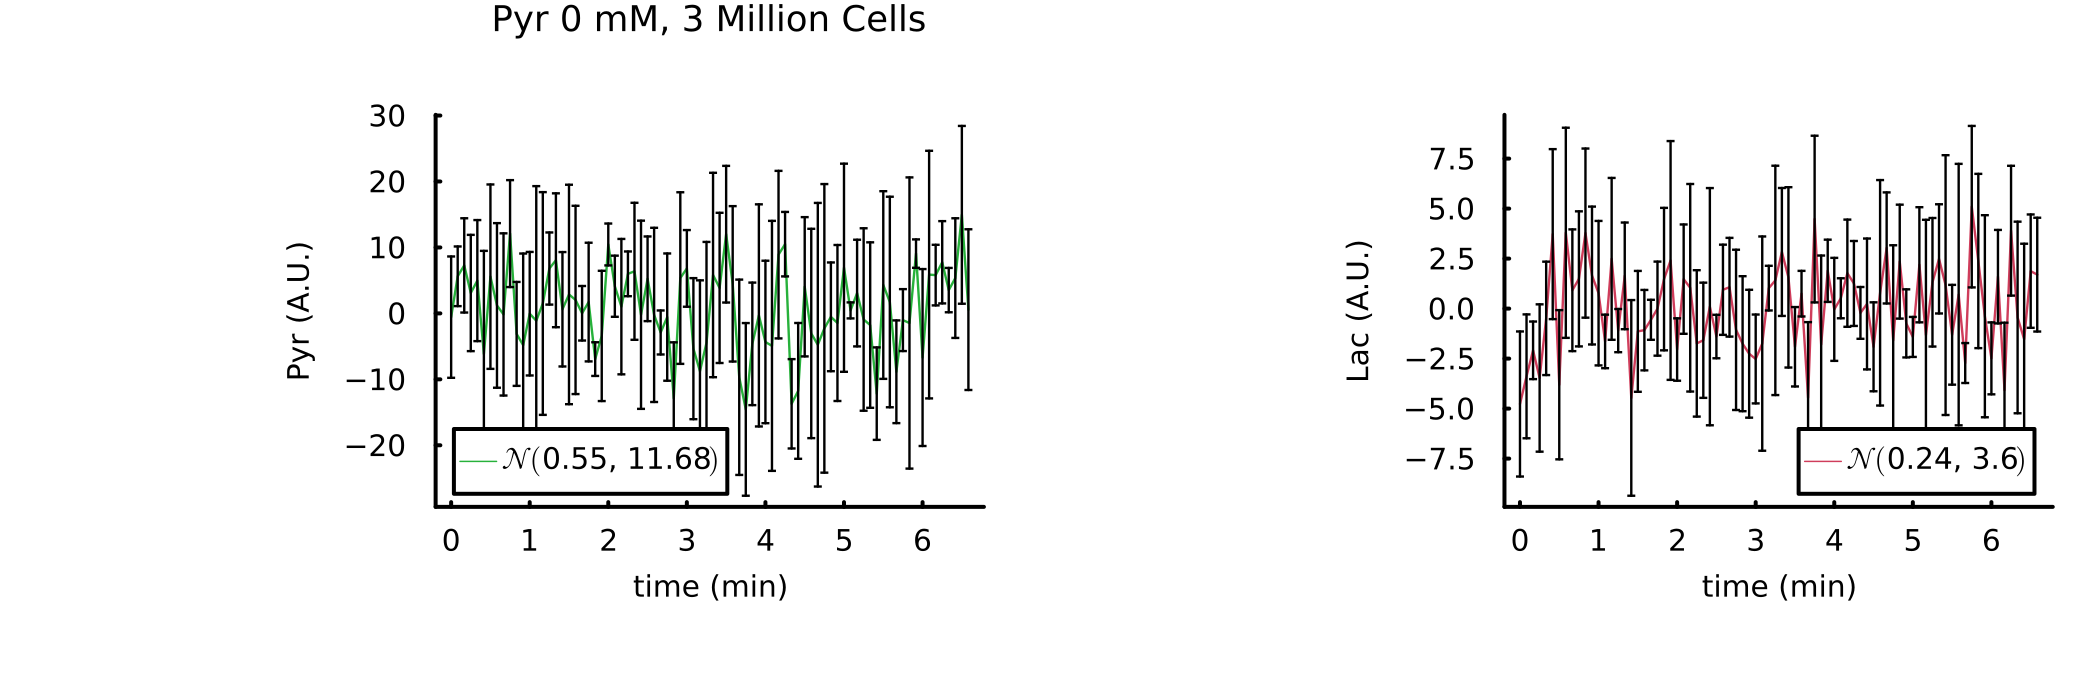

In [86]:
pp1 = plot(blankPyr[:,1]./60, blankPyr[:,2], yerror = blankPyr[:,3], 
            label = L"\mathcal{N}("*string(round(mPyr, digits = 2))*", "*string(round(sPyr, digits = 2))*L")", 
            grid = false, ylabel = "Pyr (A.U.)", 
            xlabel = "time (min)", colour = "#27b13bff", 
            title = "Pyr 0 mM, 3 Million Cells")
pp2 = plot(blankPyr[:,1]./60, blankPyr[:,4], yerror = blankPyr[:,5], 
            label = L"\mathcal{N}("*string(round(mLac2, digits = 2))*", "*string(round(sLac2, digits = 2))*L")", grid = false, ylabel = "Lac (A.U.)", 
            xlabel = "time (min)", colour = "#cf3d5bff")

PP = plot(pp1,pp2, layout = (1,2), markersize=1, markerstrokewidth=0.2, titlefontsize = 6,
linewidth=0.6, size = (2100,700), xguidefontsize=round(25/5), yguidefontsize=round(25/5), tickfontsize=round(25/5), thickness_scaling = 4, legendfontsize=5)

savefig(PP,"E:\\IBECPostDocDrive\\2024_01_16_NCvsKR\\Paper\\Figures\\SuppFig13Stuff\\PyruvateBlankData.svg")

display(PP)

In [ ]:
, markersize=1, markerstrokewidth=0.2, titlefontsize = 6,
linewidth=0.6, size = (3500,900), xguidefontsize=round(25/5), yguidefontsize=round(25/5), tickfontsize=round(25/5), thickness_scaling = 4, legendfontsize=5

In [ ]:
, markersize=1, markerstrokewidth=0.2, 
linewidth=0.6, size = (2500,900), xguidefontsize=round(25/5), yguidefontsize=round(25/5), tickfontsize=round(25/5), thickness_scaling = 4, legendfontsize=5